<a href="https://colab.research.google.com/github/pe8sutd/Colab_DSL_Practice25/blob/main/Simulation/simT01_Basys3_LogicGate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
print("[INFO]: Init the Verilog ENV")
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

[INFO]: Init the Verilog ENV
The plugin extension is already loaded. To reload it, use:
  %reload_ext plugin


## Basic Logic Gates



| sw[1] (B) | sw[0] (A) | NOT A (led[0]) | BUF B (led[1]) | AND (led[2]) | O (led[3]) | NOR (led[4]) | NAND (led[5]) | XOR (led[6]) | XNOR (led[7]) |
|:---------:|:---------:|:--------------:|:--------------:|:-----------:|:----------:|:-----------:|:------------:|:-----------:|:------------:|
| 0         | 0         | 1              | 0              | 0           | 0          | 1           | 1            | 0           | 1            |
| 0         | 1         | 0              | 0              | 0           | 1          | 0           | 1            | 1           | 0            |
| 1         | 0         | 1              | 1              | 0           | 1          | 0           | 1            | 1           | 0            |
| 1         | 1         | 0              | 1              | 1           | 1          | 0           | 0            | 0           | 1            |


The above core can be part of the module below.

## NOT Gate

Installing. Please wait... done!


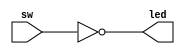

In [ ]:
%%print_verilog
//
module logic_gate(
    input sw,      // 2-bit input (sw[1], sw[0]), use 1 bit only
    output led     // 8-bit output (led[7:0]), use 1 bit only
);
    // Logic gate implementations
    assign led = ~sw;       // NOT A

    //Your Code Here;
    //Try to use different methods e.g. assign, instance;
endmodule
//

In [ ]:
%%verilog
//
module logic_gate(
    input sw,      // 2-bit input (sw[1], sw[0]), use 1 bit only
    output led     // 8-bit output (led[7:0]), use 1 bit only
);
    // Logic gate implementations
    assign led = ~sw;       // NOT A

    //Your Code Here;
    //Try to use different methods e.g. assign, instance;
endmodule
//

//
module tb;
    reg sw;
    wire led;

    logic_gate uut (sw, led);

initial begin
    $dumpfile("tb.vcd");
    $dumpvars(0,tb);

        sw =  1'b0;
        #1 sw = 1'b1;
        #1 $finish;

    $dumpoff;
end

endmodule
//

VCD info: dumpfile tb.vcd opened for output.



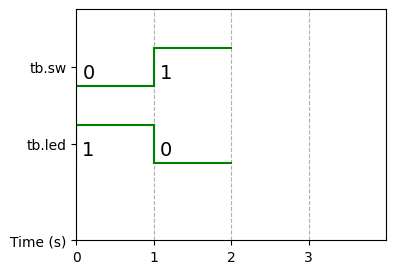

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.sw','tb.led']
time_begin = 0
time_end = 3
base = 'bin' # bin, dec, dec2, hex, octal

## NOT A, BUF B

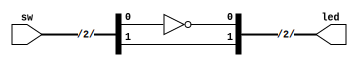

In [ ]:
%%print_verilog
//
module logic_gate(
    input [1:0] sw,      // 2-bit input (sw[1], sw[0]), use 2 bit only
    output [1:0] led     // 8-bit output (led[7:0]), use 2 bit only
);
    // Logic gate implementations
    assign led[1] = ~(~sw[1]);    // NOT B
    assign led[0] = ~sw[0];    // NOT A

    //Your Code Here;
    //Try to use different methods e.g. assign, instance;
endmodule
//

In [ ]:
%%verilog
//
module logic_gate(
    input [1:0] sw,      // 2-bit input (sw[1], sw[0]), use 2 bit only
    output [1:0] led     // 8-bit output (led[7:0]), use 2 bit only
);
    // Logic gate implementations
    assign led[1] = ~(~sw[1]);   // NOT B
    assign led[0] = ~sw[0];      // NOT A

    //Your Code Here;
    //Try to use different methods e.g. assign, instance;
endmodule
//

//
module tb;
    reg [1:0] sw;
    wire [1:0] led;

    logic_gate uut (sw, led);

initial begin
    $dumpfile("tb.vcd");
    $dumpvars(0,tb);

        sw =  2'b00;
        #1 sw = 2'b01;
        #1 sw = 2'b10;
        #1 sw = 2'b11;
        #1 $finish;

    $dumpoff;
end

endmodule
//

VCD info: dumpfile tb.vcd opened for output.



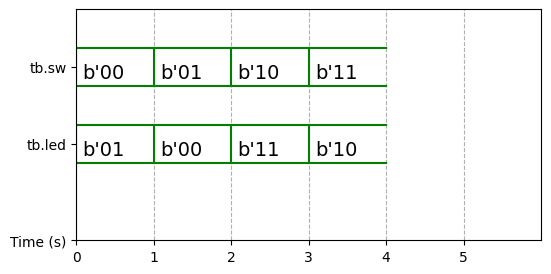

In [ ]:
%%waveform tb.vcd
sign_list = ['tb.sw','tb.led']
time_begin = 0
time_end = 5
base = 'bin' # bin, dec, dec2, hex, octal

There are four possible combination of switches (sw[1], sw[0]), which are 00, 01, 10, 11.
For tb.sw = b'00 means sw[1]=0, sw=[0]
which is corresponding to tb.led = b'01 means led[1]=0, led[0]=1
which is a results of led[1] = Not (Not of sw[1]), led[0] = Not of sw[0].

## Youtube

Video guide in Youtube for collaboration work between Colab and Vivado. The design is veried in Colab, which are viewing the schematics, module, testbench, and waveform viewing. After the verification, the design is transferred to the Vivado for synthesis, implementation, and program to the FPGA.

1. Colab - Vivado: HDL Simulation: \
https://youtu.be/XHfUL1wA28E


2. Colab - Vivado: HDL Syn-Impl-Prog \
https://youtu.be/vi_oclepHcc


3. Colab - Vivado: Progrm Device (add on to the above video) \
https://youtu.be/qcJks7dzj-M
